<a href="https://colab.research.google.com/github/Adj95/python_dsc/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEATURE ENGINEERING **

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("/content/placement.csv")
df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split (df1.drop('placed' , axis = 1) , df1['placed'] , test_size = 0.3  , random_state = 0)

x_train.shape , x_test.shape  , y_train.shape , y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

x_train_trf = pd.DataFrame(x_train_trf , columns = x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf , columns = x_test.columns)

Text(0, 0.5, 'placement_exam_marks after standarisation ')

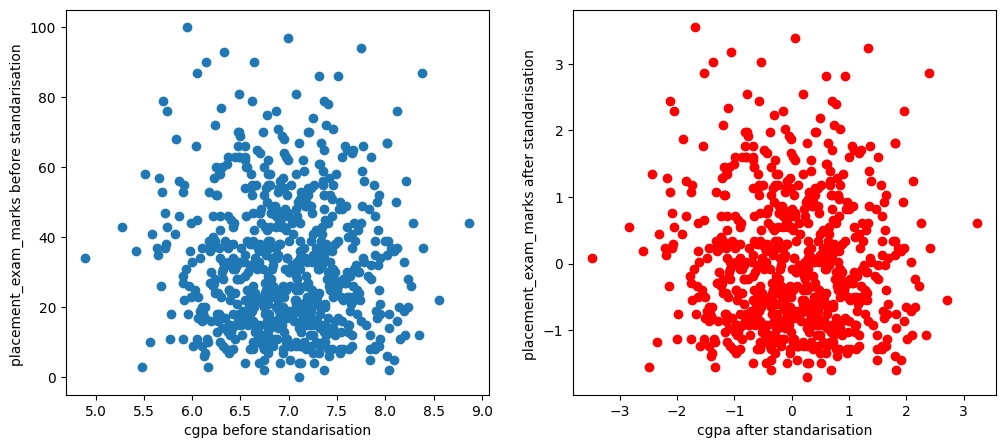

In [ ]:
fig , ax= plt.subplots(1,2 , figsize=(12,5))

ax[0].scatter(x_train['cgpa'] , x_train['placement_exam_marks'])
ax[0].set_xlabel('cgpa before standarisation')
ax[0].set_ylabel('placement_exam_marks before standarisation ')
ax[1].scatter(x_train_trf['cgpa'] , x_train_trf['placement_exam_marks'] , color = 'red')
ax[1].set_xlabel('cgpa after standarisation')
ax[1].set_ylabel('placement_exam_marks after standarisation ')


clearly from the above analysis it can be identified that standarisation causes mean to be zero and std.deviation to be 1 without affecting the distribution

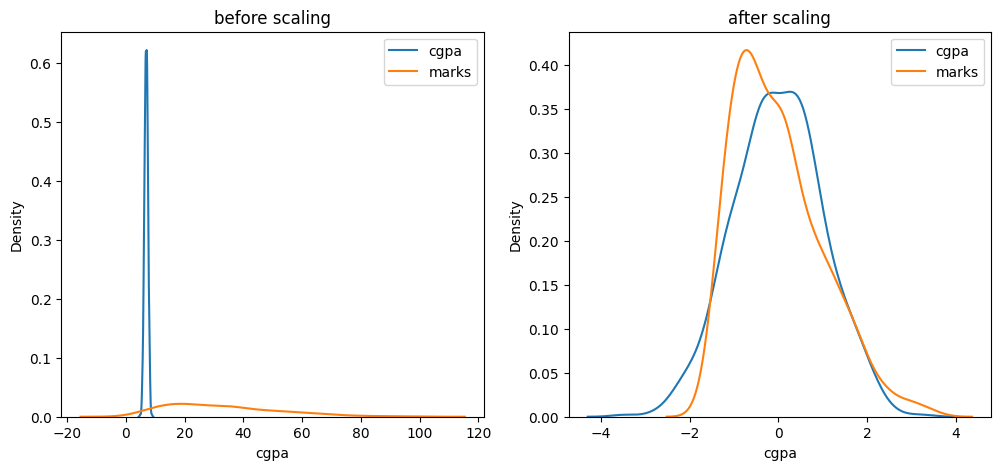

In [ ]:
fig , ax= plt.subplots(1,2 , figsize=(12,5))

ax[0].set_title("before scaling")
sns.kdeplot(x_train['cgpa'] ,label = 'cgpa'  ,ax = ax[0])
sns.kdeplot(x_train['placement_exam_marks'] , label  = 'marks' ,ax = ax[0])


ax[1].set_title("after scaling")
sns.kdeplot(x_train_trf['cgpa'] ,label = 'cgpa', ax = ax[1])
sns.kdeplot(x_train_trf['placement_exam_marks'] ,label  = 'marks' , ax = ax[1])
ax[0].legend()
ax[1].legend()

## **FEATURE-SCALING NORMALISATION**

In [8]:
df2 = pd.read_csv("/content/wine_data.csv")
df2.head()

,category,alcohol,malic_acid,glucose,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Text(0, 0.5, 'malic_acid')

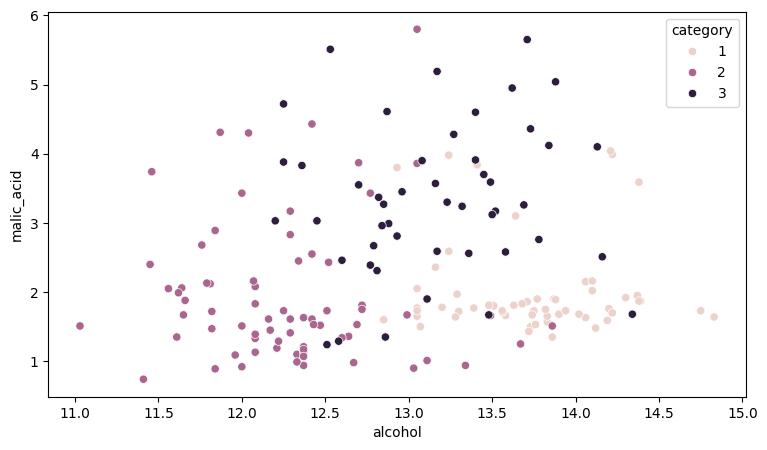

In [9]:
fig = plt.subplots(figsize = (9,5) )
sns.scatterplot(x = 'alcohol' , y='malic_acid' , hue = 'category', data = df2)
plt.xlabel("alcohol")
plt.ylabel ( "malic_acid")


In [10]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split (df2.drop('category' , axis = 1) , df2['category'] , test_size = 0.3  , random_state = 0)
x_train.shape
x_test.shape

(54, 13)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [12]:
x_train_trf = pd.DataFrame(x_train_trf , columns = x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf , columns = x_test.columns)


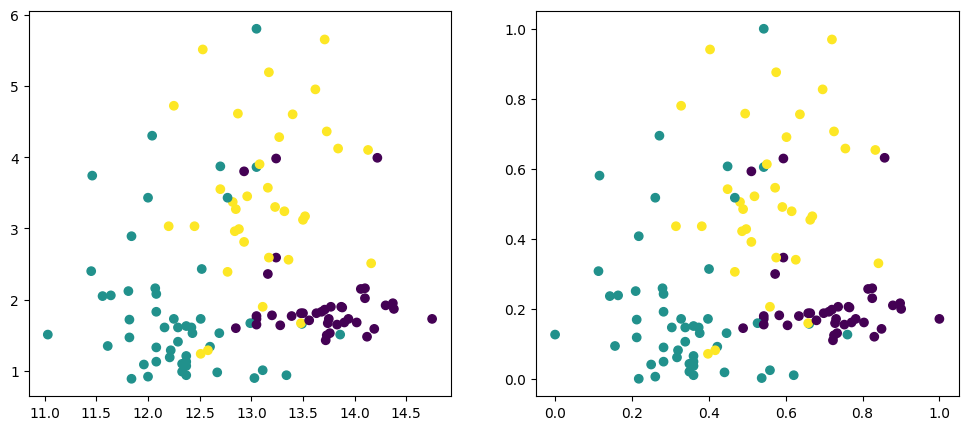

In [13]:
fig , ax= plt.subplots(1,2 , figsize=(12,5))

ax[0].scatter(x_train['alcohol'] , x_train['malic_acid'] ,  c=y_train)

ax[1].scatter(x_train_trf['alcohol'] , x_train_trf['malic_acid'] , c = y_train)


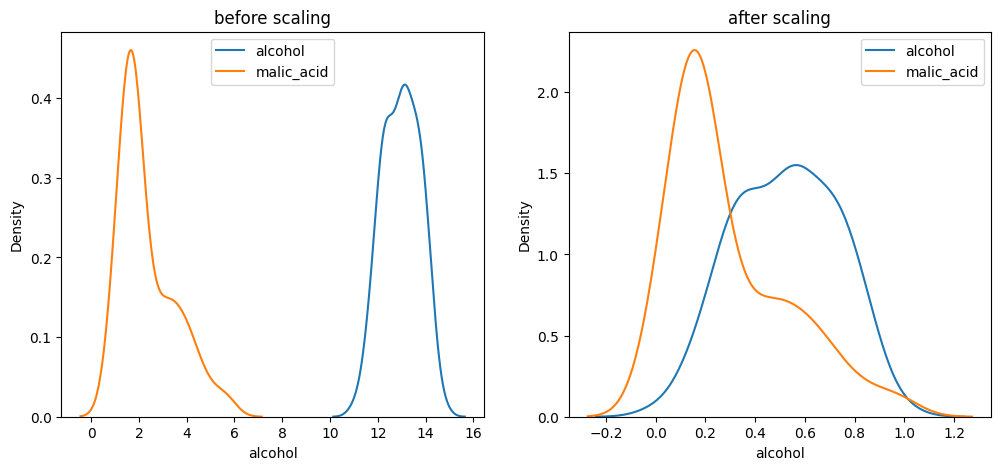

In [14]:
fig , ax= plt.subplots(1,2 , figsize=(12,5))

ax[0].set_title("before scaling")
sns.kdeplot(x_train['alcohol'] ,label = 'alcohol'  ,ax = ax[0])
sns.kdeplot(x_train['malic_acid'] , label  = 'malic_acid' ,ax = ax[0])


ax[1].set_title("after scaling")
sns.kdeplot(x_train_trf['alcohol'] ,label = 'alcohol', ax = ax[1])
sns.kdeplot(x_train_trf['malic_acid'] ,label  = 'malic_acid' , ax = ax[1])
ax[0].legend()
ax[1].legend()

<Axes: title={'center': 'after scaling'}, xlabel='malic_acid', ylabel='Density'>

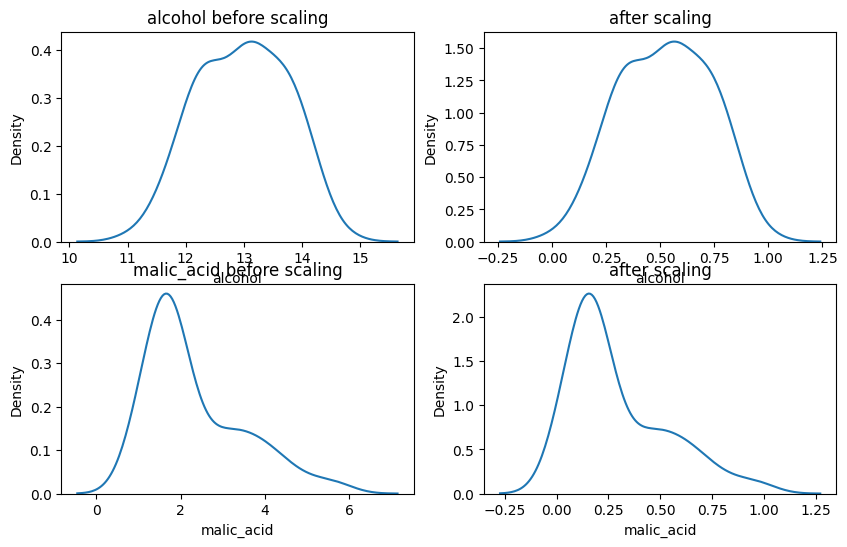

In [26]:
fig , ax = plt.subplots(2,2 , figsize =(10,6))

ax[0][0].set_title("alcohol before scaling")
sns.kdeplot(x_train['alcohol'] ,label ="alcohol", ax = ax[0][0]  )

ax[0][1].set_title("after scaling")
sns.kdeplot( x_train_trf['alcohol']  ,  label = "alcohol" , ax = ax[0][1] )

ax[1][0].set_title("malic_acid before scaling")
sns.kdeplot(x_train['malic_acid'] ,label ="malic_acid", ax = ax[1][0]  )

ax[1][1].set_title("after scaling")
sns.kdeplot( x_train_trf['malic_acid']  ,  label = "malic_acid" , ax = ax[1][1] )